In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score


In [2]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
df_y = pd.DataFrame(mnist.target)

In [5]:
df_X  = pd.DataFrame(mnist.data)

In [6]:
df = pd.concat([df_X, df_y], axis=1)

In [7]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

kFold_handler=KFold(n_splits=5, shuffle=True)

def LDA_(dimension, X, y):
  lda = LinearDiscriminantAnalysis(n_components=dimension)
  return lda.fit_transform(X, y)

def perceptron_(X_train, y_train, X_val, y_val):
  perceptron_classifier = Perceptron()
  perceptron_classifier.fit(X_train, y_train)
  train_prediction = perceptron_classifier.predict(X_train)
  val_prediction = perceptron_classifier.predict(X_val)
  train_accu = accuracy_score(y_train, train_prediction)
  val_accu = accuracy_score(y_val, val_prediction)
  return train_accu, val_accu



In [ ]:
number_of_iters = 10
dimensions = [2,3,4,5,6,7,8,9]
#dimensions = [2,5,9]
train_accu = {2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
val_accu = {2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for dim in dimensions:
  X_train_lda = pd.DataFrame(LDA_(dim, X_train, y_train))

  for i in range(number_of_iters):
    train_accu_iter = []
    val_accu_iter = []
    for train_index, val_index in kFold_handler.split(X_train_lda, y_train):
      X_train_4folds = X_train_lda.iloc[train_index]
      X_val_1fold = X_train_lda.iloc[val_index]
      y_train_4folds = y_train.iloc[train_index]
      y_val_1fold = y_train.iloc[val_index]
      a,b = perceptron_(X_train_4folds, y_train_4folds, X_val_1fold, y_val_1fold)
      train_accu_iter.append(a)
      val_accu_iter.append(b)
    train_accu[dim].append(np.mean(train_accu_iter))
    val_accu[dim].append(np.mean(val_accu_iter))

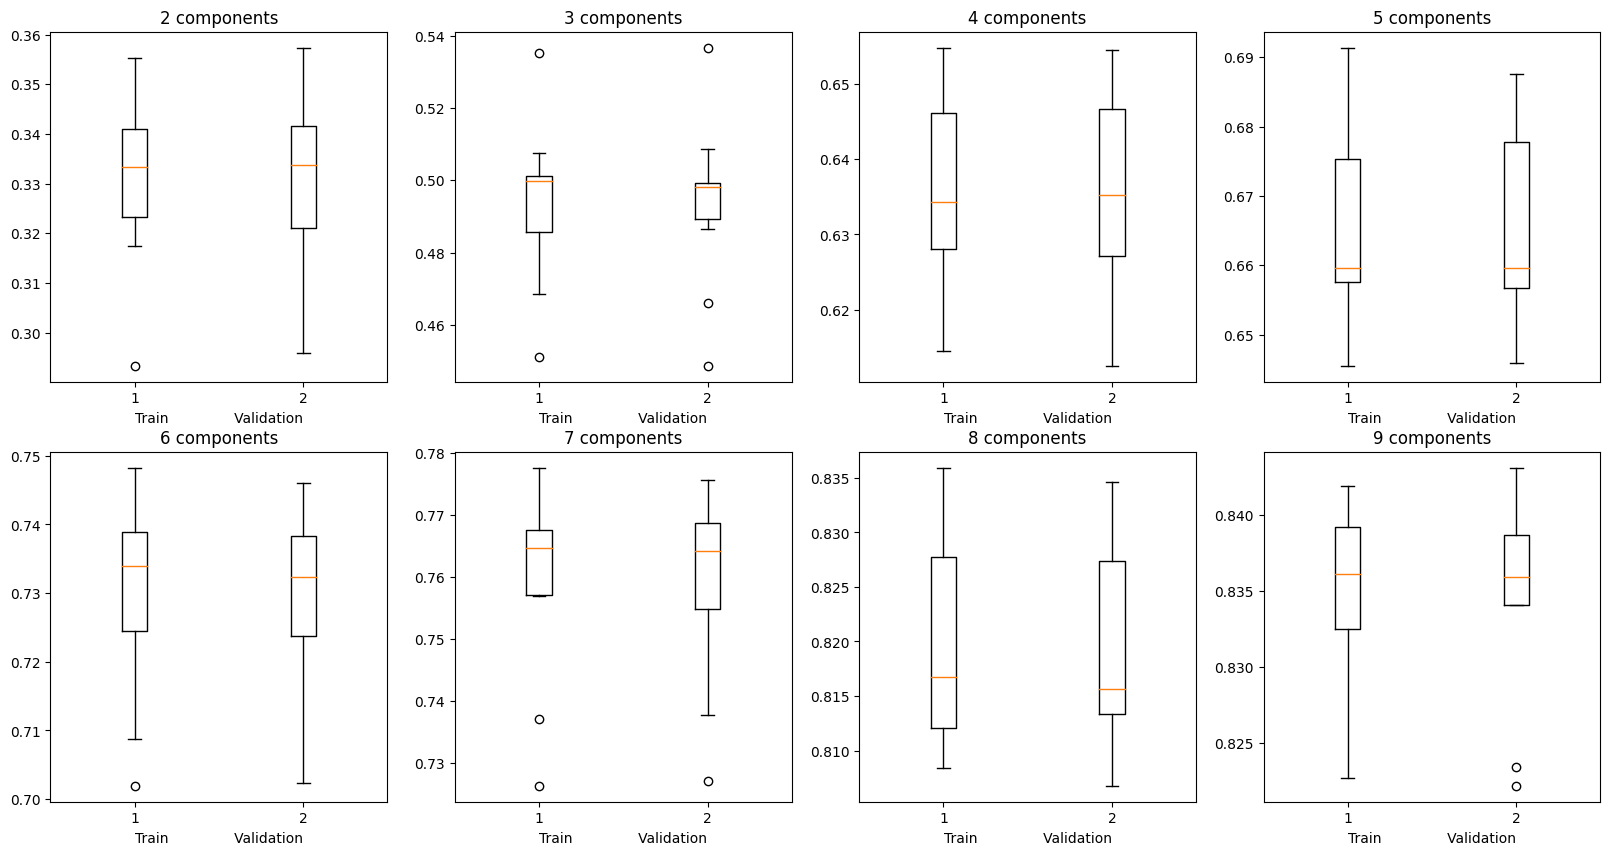

In [37]:
plt.figure(figsize=[20, 10])

for dim in dimensions:
  plt.subplot(2,4,dim-1)
  plt.boxplot([train_accu[dim], val_accu[dim]])
  plt.xlabel('Train               Validation')
  plt.title(f'{dim} components')





now to make the model a little better:

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm_classifier = SVC()

# 5-fold cross-validation on the training set
cv_scores = cross_val_score(svm_classifier, X_train_lda, y_train, cv=5)

# the best model based on the highest cross-validated accuracy
best_svm_model = SVC()
best_svm_model.fit(X_train_lda, y_train)

# accuracy on the training set
train_accuracy = accuracy_score(y_train, best_svm_model.predict(X_train_lda))
print("Training Accuracy:", train_accuracy)
print("Cross-validated Accuracies:", cv_scores)

# predict the test set
y_test_pred = best_svm_model.predict(X_test_lda)

# accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy using Best Model:", test_accuracy)

# confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training Accuracy: 0.9265
Cross-validated Accuracies: [0.91651786 0.92178571 0.92330357 0.91875    0.92107143]
Test Accuracy using Best Model: 0.9247857142857143
Confusion Matrix:
[[1313    0    4    0    2    8    8    2    3    3]
 [   0 1541   16    8    2    7    1    3   19    3]
 [  13    2 1284   24   11    7   16    7   15    1]
 [   3    7   27 1289    2   42    4   17   33    9]
 [   3    4    5    0 1222    7    5    2   12   35]
 [   7    2   11   42    3 1138   10    6   46    8]
 [  13    0    9    0    9   24 1335    0    6    0]
 [   1   12   15    5   12    2    0 1389    8   59]
 [   8   37   26   45    9   32    8    6 1170   16]
 [   9    4    7   16   69    6    0   28   15 1266]]
